In [12]:
import pandas as pd

# Specify the file path of the dataset
file_path = "../data/benin-malanville.csv"

# Read the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Comments    525600
dtype: int64


In [8]:
# Remove all rows with any NaN values
data = data.dropna()

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [13]:
# Convert 'Timestamp' to datetime and set as index
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

<Figure size 1400x700 with 0 Axes>

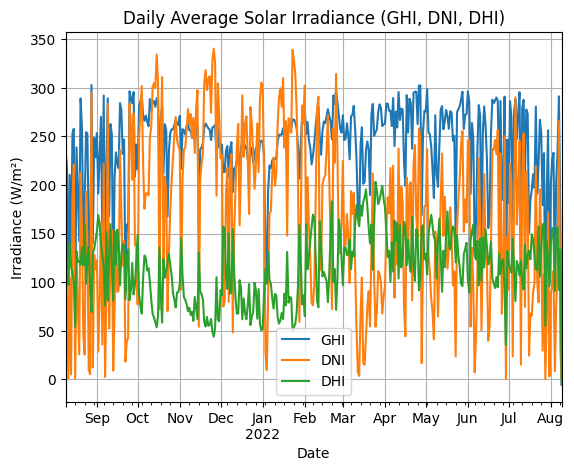

In [14]:
import matplotlib.pyplot as plt

# Plot solar irradiance data
plt.figure(figsize=(14, 7))
data[['GHI', 'DNI', 'DHI']].resample('D').mean().plot()
plt.title('Daily Average Solar Irradiance (GHI, DNI, DHI)')
plt.ylabel('Irradiance (W/m²)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

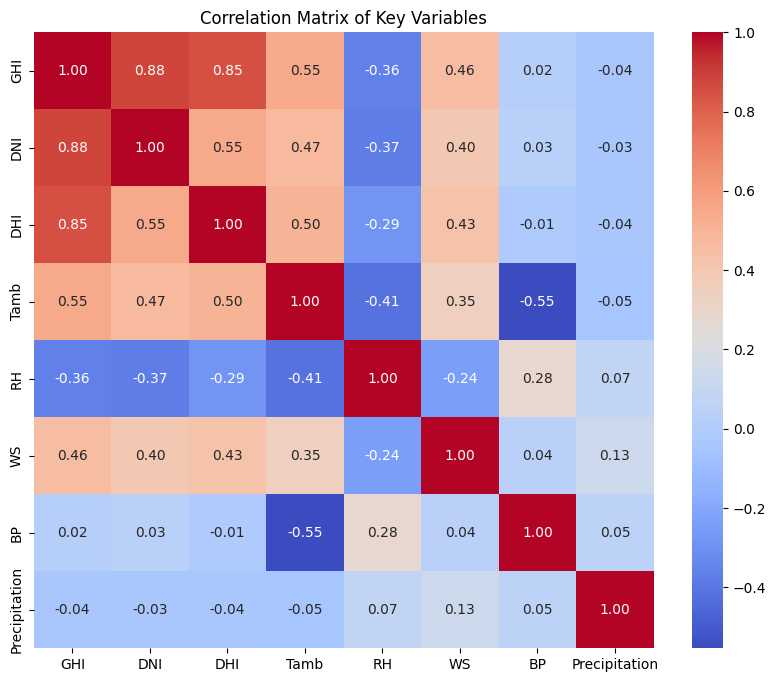

In [5]:
import seaborn as sns

# Calculate and plot the correlation matrix
correlation_matrix = data[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'Precipitation']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

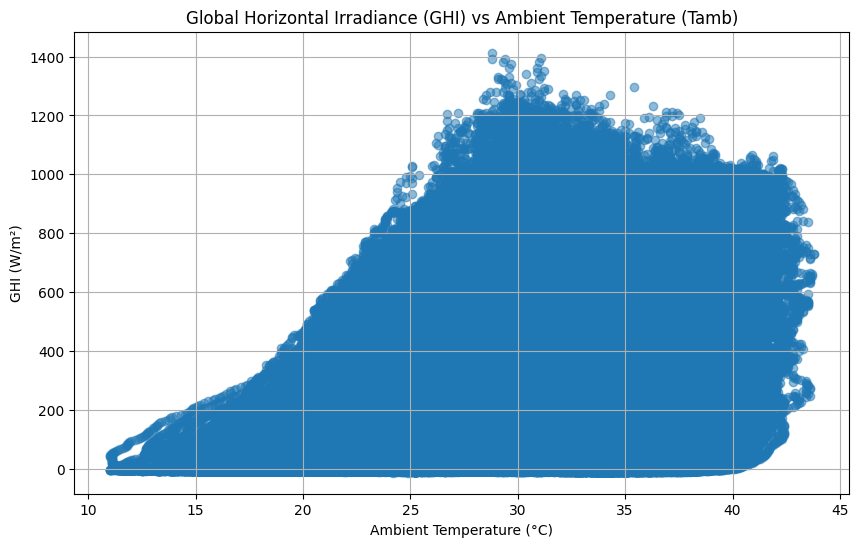

In [6]:
# Plot the relationship between GHI and Temperature
plt.figure(figsize=(10, 6))
plt.scatter(data['Tamb'], data['GHI'], alpha=0.5)
plt.title('Global Horizontal Irradiance (GHI) vs Ambient Temperature (Tamb)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

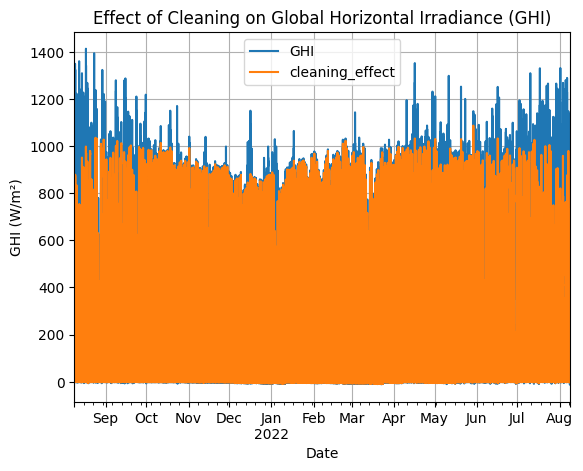

In [7]:
# Compare GHI before and after cleaning events
data['cleaning_effect'] = data['GHI'].rolling(window=60).mean()

plt.figure(figsize=(14, 7))
data[['GHI', 'cleaning_effect']].plot()
plt.title('Effect of Cleaning on Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Date')
plt.grid(True)
plt.show()
